In [1]:
#SHC Web http://www.engineeringtoolbox.com/specific-heat-solids-d_154.html
#We site the NREL solar radiation reading page 47 to have the daily solar gain as precise as possible and this is according to 
#Sacramento, California's solar radiation BTU/foot/day

# Matt Hargadon, Sarah Caranza, Matt Uchiyama, Angel Garza
# Design Objective:
Our objective is to trap as much heat into our box by our reflective design while using the sunlight reflected into the box to trap heat into our brilliantly designed rocks.

# Design Strategy:
- For the design portion of the project, we quickly decided on creating a box that used the reflection from the sun's rays to bounce around inside the box. We kept the reflective part of the foam intact and used a reflective tape of any portion of the box we assumed that light would touch. 
- For the window, we wanted to use something more durable than saran wrap, so we used an polycarbonate clear film that was durable against wind to reduce the energy loss during the night.
- As we ran sample calculations using sagemathcloud, we estimated the need for about 3 layers of insultation so that the energy loss at night is about equal to the energy gain during the day. We used two half inch layers of insulation and one layer of one inch insulation.
- Thermal Mass Storage: 33.8 ounces of water in water bottles, approximately 162 ounces of water in tupperware containers, and about 1.5 pounds of rock.  
- For the thermal mass, we wanted to use rocks as the only source of heat, but later came to the conclusion that the amount we needed would easily exeed 30 pounds. So instead, we settled for using a fusion of rocks and water layered strategically around the box to hopefully recieve optimum sunlight. A unique design aspect we added to our thermal mass was painting all the rocks, tupperware containers, and water bottles black. We decided to do this because we have learned through many of our ENSP classes that black works by absorbing all the colors and capturing the energy that goes through it. Easier absorption would lead to more heat trapped in our thermal mass to keep a more comfortable temperature through the night.
![](IMG_2637.jpg)

# Estimates of performance:
### UA product
We estimated our UA product to be about $\frac{0.84  BTU}{F * hour}$
### Expected temperature difference
Our goal was to have a 15 degree Fahrenheit difference in temperature, but with the amount of thermal mass we ended up using, we may see a temperature difference of about 10 degrees.
### Night Energy Loss
Our night loss seems sort of optimistic, but with our calculations we estimated it to be about 
$250 BTUs$ lost per night.
### Daily Solar Gain
##### Using our calculations:
The daily solar gain seemed to be an underestimate, but with the weather conditions 
for the day we tested our box it may be about $180 BTU$
##### Using the California Solar Radiation for Sacramento:
The NREL solar radiation reading gave us a very optimistic estimation of $325 BTUs$ 



In [2]:
from pint import UnitRegistry 
u = UnitRegistry ()

The next cell quanitfies our estimates for the area of a rectangular prism that is modeled to be the ETC.

In [3]:
#size of box
length = (15 * u.inch).to (u.feet)
width = (11 * u.inch).to (u.feet)
height = (11 * u.inch).to (u.feet)
window = (49 * u.inch**2).to (u.feet**2)
surface_area_Box = 2 * (width*length + height*length + height*width)
surface_area_cb = surface_area_Box - window
#UPDATE: Took away ONE inch from length, width, height
#List of R-Val
rval_cardboard = 3 * (u.ft**2 * u.degR *u.hr / u.BTU)
rval_box = rval_cardboard * (1/4)
rval_foam = (1.93 * (u.ft**2 * u.degR *u.hr / u.BTU)) * 4
rval_InAF = .68 * (u.ft**2 * u.degR *u.hr / u.BTU)
rval_OutAF = .17 * (u.ft**2 * u.degR *u.hr / u.BTU)
rval_WAF = .68 * (u.ft**2 * u.degR *u.hr / u.BTU)
#We calculated the r-value by using the inverse of the thermal conductivity on www.plasticsintl.com and then multiplied by given
#0.093 inch thickness
rval_acryl = 0.1 * (u.ft**2 * u.degR *u.hr / u.BTU)
#UA of box and window 
RVAL_CB = rval_box + rval_foam + rval_InAF + rval_OutAF
# need to find an r-value for acrylic 
#rval_acryl = .1 * (u.ft**2 * u.degR *u.hr / u.BTU)
RVAL_WIN = rval_InAF + rval_OutAF + rval_WAF + rval_acryl
UA_CB = (1 / RVAL_CB) * surface_area_cb
UA_WIN = (1 / RVAL_WIN) * window
TOT_UA = UA_CB + UA_WIN
TOT_UA

<Quantity(0.844339964190737, 'btu / degR / hour')>

In [4]:
#night energy loss
temp_high = 75 * u.degR
temp_low = 45 * u.degR
temp_diff = temp_high - temp_low
dark_hr = 10 * u.hour
night_loss= TOT_UA * temp_diff * dark_hr
night_loss

<Quantity(253.30198925722107, 'btu')>

In [5]:
#Solar Gain using our own temperature difference and calculations
high_temp = 75 * u.degR
low_temp = 60 * u.degR
diff_temp = high_temp - low_temp
sun_hr = 14 * u.hour
solar_gain = TOT_UA * diff_temp * sun_hr
solar_gain

<Quantity(177.31139248005476, 'btu')>

In [6]:
#daily solar gain using the Sacramento Solar Radiation chart
Sac_SolarRad = 960 * u.BTU/ u.foot**2 / u.day
test = Sac_SolarRad * window 
test

<Quantity(326.6666666666667, 'btu / day')>

In [7]:
#thermal mass
rocks = 47.1 * u.lb
#measure weight of rocks after box is done
heat_capacity = 0.18 * u.Btu / u.lb / u.degR
mass_need = solar_gain / (heat_capacity * diff_temp)
mass_need
mc_tot = 12.5 * u.BTU/ u.degR
#We need to add NINE containers of water and two water bottles

In [8]:
diff_T = night_loss / mc_tot
diff_T

<Quantity(20.264159140577686, 'degR')>

# Results and Evaluation of Data
The day we tested our box was moderately cool and had some light rain. That day there was a high temperature of 22 DegC (71.5F) and a low of 9.5 DegC (49F).  Our box reached a max tempature of 22 DegC and a low of 17 DegC (62.5F). During the middle of the day there was a outside temperature fluctuating between 16 DegC - 22 DegC. During this same time our box had a very small fluctuation of 1 degree Celsius. We believe our fluctuation was so minimal being that we had a South facing window allowing our thermal mass to capture the insolation coming in and slowly releasing within this same amount of time.  As the day turned to night the temperature inside our box decreased at a much slower rate compared to the outside tempatures decline rate.  The inside of our box didn't drop below 18C/65F until 2:00AM.  This would be acceptable in one's home because the occupants would most likely be sleeping with blankets. 

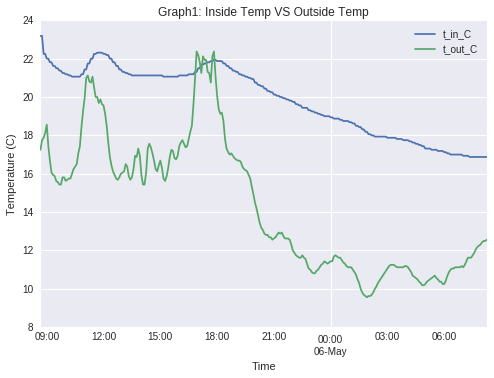

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

data = pd.read_csv('solar_gains.csv', parse_dates=True, index_col=0)
data[['t_in_C', 't_out_C']].plot()
plt.title('Graph1: Inside Temp VS Outside Temp')
plt.ylabel('Temperature (C)')
plt.show()

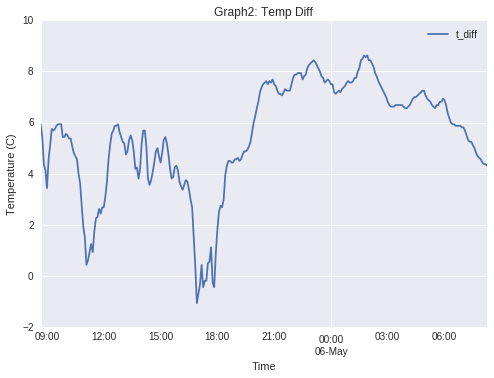

In [10]:
data = pd.read_csv('solar_gains.csv', parse_dates=True, index_col=0)
data['t_diff'] = data['t_in_C'] - data['t_out_C']
data[['t_diff']].plot()
plt.title('Graph2: Temp Diff')
plt.ylabel('Temperature (C)')
plt.show()

Graph 3 shows the combination of the outside and inside temperatures as well as our temperature difference.

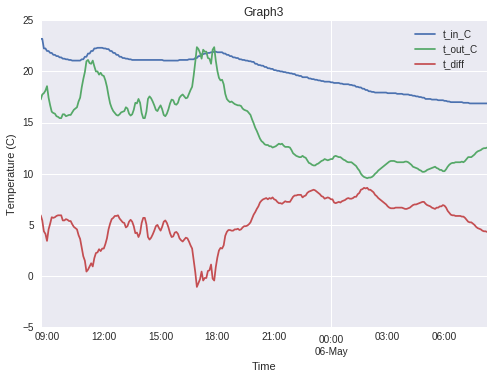

In [11]:
data = pd.read_csv('solar_gains.csv', parse_dates=True, index_col=0)
data['t_diff'] = data['t_in_C'] - data['t_out_C']
data[['t_in_C', 't_out_C', 't_diff']].plot()
plt.title('Graph3')
plt.ylabel('Temperature (C)')
plt.show()

# Contributions: (our last name initials spell CHUG 😂)
### Sarah C:
Helped with the construction and design of the box, calculated the energy loss and solar gain, contributed to the buying of extra materials, and contributed to finalization of Project Report.
###   Matt H:
Constructed the majority of the box, helped teammates understand concepts, how the design can contribute to things like radiation, and and contributed to finalization of Project Report.
###   Matt U:
Researched important values of all materials, contributed to the buying of extra materials, assisted in construction of the box, created a better window, helped with calculations, and contributed to finalization of Project Report.
### Angel G:
Converted paper calculations to sagemathcloud with units, helped with calculating the various UA products, and wrote the write up portion of the project.